# LatLonProfiles diagnostic

The aim of this diagnostic is to visualise latitudinal or longitudinal profiles of a certain variable. In addition, plots are allowed to have multiple lines and/or show the seasonal and annual means of the selected variable.


In [1]:
%reload_ext autoreload
%autoreload 2

Let's start with the import of the class `LatLonProfiles`:

In [2]:
from aqua.diagnostics.lat_lon_profiles import LatLonProfiles

We generate a dictionary, `dataset_dict`, including the data we want to plot in this notebook, while `common_dict` displays the characteristics of the data to be plotted.

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

In [4]:
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}

We hence generate an object of the `LatLonProfiles` class, and we decide to plot a zonal profile as an example. This means that the code will be performing the zonal mean, by averaging across the longitudes. 

By default, the `mean_type` parameter in set as 'zonal' (so the profile will be zonal even without a specific `mean_type` setting), but to visualise the meridional profile, one can just set it to 'meridional'.

In [5]:
lonlat_dataset = LatLonProfiles(**dataset_dict, **common_dict, mean_type='zonal')

2025-07-03 18:28:02 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None


In [6]:
lonlat_obs = LatLonProfiles(**obs_dict, **common_dict, mean_type='zonal')

2025-07-03 18:28:02 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None


And we select the variable we want to plot as well as its measure units:

In [7]:
run_dict = {'var': '2t',
            'units': 'degC'}

We prepare the data to be plotted via the `run` method of the LatLonProfiles class:

In [8]:
lonlat_dataset.run(**run_dict)

2025-07-03 18:28:02 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for 2t


2025-07-03 18:28:02 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-07-03 18:28:03 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-07-03 18:28:03 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-07-03 18:28:03 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-07-03 18:28:03 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-07-03 18:28:03 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-07-03 18:28:03 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-07-03 18:28:03 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-07-03 18:28:03 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-07-03 18:28:03 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-07-03 18:28:03 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-07

In [9]:
lonlat_obs.run(**run_dict)

2025-07-03 18:28:16 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for 2t
2025-07-03 18:28:16 :: ConfigPath :: INFO     -> ERA5_era5_monthly triplet found in in obs!
2025-07-03 18:28:16 :: ConfigPath :: INFO     -> ERA5_era5_monthly triplet found in in obs!


2025-07-03 18:28:16 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-07-03 18:28:16 :: Fixer :: INFO     -> Fix names in metadata is ERA5-destine-v1
2025-07-03 18:28:16 :: Fixer :: INFO     -> Fix names ERA5-destine-v1 found in fixes files
2025-07-03 18:28:16 :: Fixer :: INFO     -> Fix names in metadata is ERA5-destine-v1
2025-07-03 18:28:16 :: Fixer :: INFO     -> Fix names ERA5-destine-v1 found in fixes files
2025-07-03 18:28:16 :: Reader :: INFO     -> Grid metadata is era5-r025s
2025-07-03 18:28:16 :: Regridder :: INFO     -> Grid name: era5-r025s
2025-07-03 18:28:16 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_era5-r025s.nc.
2025-07-03 18:28:16 :: CoordTransator :: INFO     -> Grid type: Regular
2025-07-03 18:28:16 :: Reader :: INFO     -> Grid metadata is era5-r025s
2025-07-03 18:28:16 :: Regridder :: INFO     -> Grid name: era5-r025s
2025-07-03 18:28:16 :: Regridder :: INFO     -> Lo

The main diagnostic class for plotting is PlotLatLonProfiles, that we import:

In [10]:
from aqua.diagnostics.lat_lon_profiles import PlotLatLonProfiles

Both seasonal and annual data can be plotted. Let us start with a single line plot of the `2t` monthly data. When monthly data are given as argument, these will be always prioritised by the class.

## Single profile
### Single plot
We can choose how to select the timestep, with `isel` or by selecting the month of interest with `sel`.

In [11]:
single_month = lonlat_dataset.monthly.isel(time=0)
#single_month = lonlat_dataset.monthly.sel(time='1990-01-31')
single_annual = lonlat_dataset.annual.isel(time=0)
#single_annual = lonlat_dataset.annual.sel(time='1990-12-31')

In [12]:
# Choose monthly data (prioritized over annual)
data_to_use = single_month if single_month is not None else single_annual

# Prepare reference data
single_month_obs = lonlat_obs.monthly.isel(time=0)
single_annual_obs = lonlat_obs.annual.isel(time=0)
ref_data_to_use = single_month_obs if single_month_obs is not None else single_annual_obs

plot_dict = {'monthly_data': [data_to_use],  # Note: needs to be a list for PlotLatLonProfiles
             'ref_monthly_data': ref_data_to_use,  # Reference data
             'loglevel': 'INFO'}

We here plot the single profile, retrieve the plot labels and info via the metadata. 

Lastly, we save the plot:

2025-07-03 18:28:25 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-03 18:28:25 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-03 18:28:25 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-03 18:28:25 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-03 18:28:25 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.2t.png


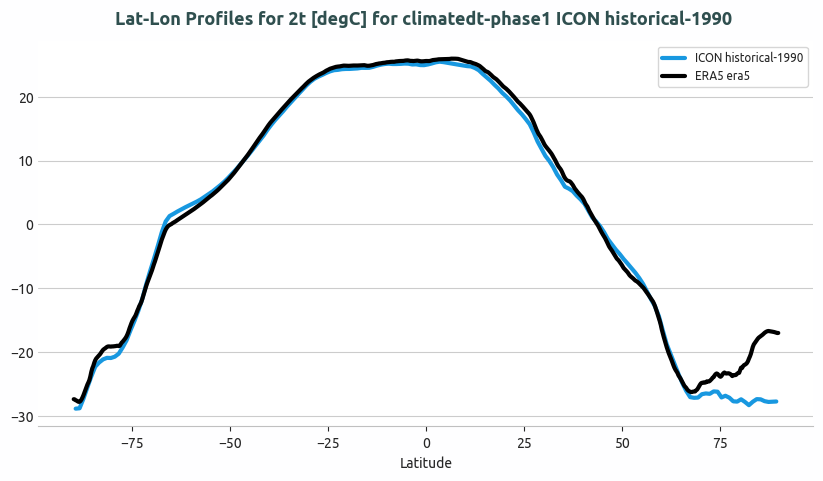

In [13]:
plot = PlotLatLonProfiles(**plot_dict)
data_labels = plot.set_data_labels()
ref_labels = plot.set_ref_label()
desc = plot.set_description()
title = plot.set_title(var=run_dict['var'], units=run_dict['units'])
fig, _ = plot.plot_lat_lon_profiles(data_labels=data_labels, ref_label=ref_labels, title=title)
plot.save_plot(fig=fig, var=run_dict['var'], description=desc)

## Seasonal and annual mean profiles plot

We hence compute the seasonal and annual means for the `lonlat_dataset` object, to be prepared for the next plot:

In [14]:
lonlat_dataset.compute_seasonal_and_annual_means()

2025-07-03 18:28:25 :: LatLonProfiles :: INFO     -> Computing seasonal and annual means from monthly data
2025-07-03 18:28:25 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-03 18:28:25 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-03 18:28:25 :: TimStat :: INFO     -> Computing annual mean...
2025-07-03 18:28:25 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully
2025-07-03 18:28:25 :: TimStat :: INFO     -> Computing annual mean...
2025-07-03 18:28:25 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully


In [15]:
lonlat_obs.compute_seasonal_and_annual_means()

2025-07-03 18:28:25 :: LatLonProfiles :: INFO     -> Computing seasonal and annual means from monthly data
2025-07-03 18:28:25 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-03 18:28:25 :: TimStat :: INFO     -> Computing annual mean...
2025-07-03 18:28:25 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully
2025-07-03 18:28:25 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-03 18:28:25 :: TimStat :: INFO     -> Computing annual mean...
2025-07-03 18:28:25 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully


The PlotLatLonProfiles class supports the possibility to plot the seasonal profiles for the DJF, MAM, JJA and SON seasons, as well as a big subplot at the bottom with the annual means. As such:

## Seasonal and annual mean profiles with reference data

Now we can plot seasonal profiles with reference data included. The reference data (ERA5) will be shown alongside the model data for comparison:

2025-07-03 18:28:25 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles


2025-07-03 18:28:43 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-03 18:28:46 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-03 18:28:46 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-03 18:28:46 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully
2025-07-03 18:28:46 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-03 18:28:46 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-03 18:28:46 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


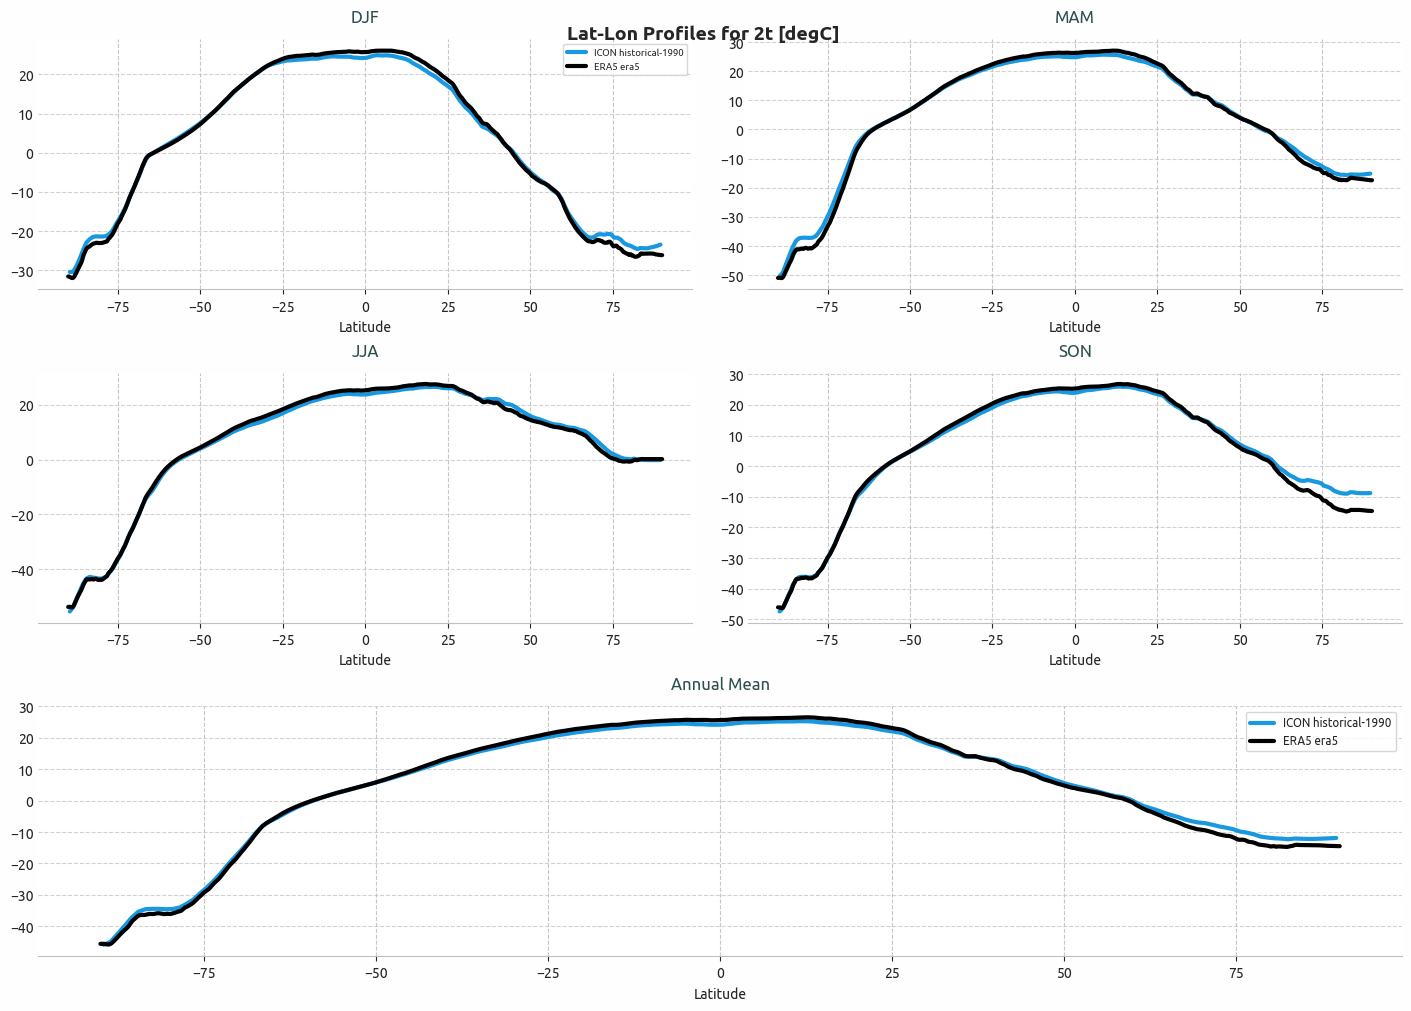

In [16]:
# Combine seasonal data with reference data
combined_seasonal_model_data = []
combined_seasonal_ref_data = []

for i in range(5):  # DJF, MAM, JJA, SON, Annual
    combined_seasonal_model_data.append([lonlat_dataset.seasonal_annual_means[i]])  # Model data as list
    combined_seasonal_ref_data.append(lonlat_obs.seasonal_annual_means[i])         # Reference data (ERA5)

seasonal_plot = PlotLatLonProfiles(
    seasonal_annual_data=combined_seasonal_model_data, 
    seasonal_annual_ref_data=combined_seasonal_ref_data,  # Pass reference data separately
    loglevel='INFO'
)
seasonal_plot.run(var=run_dict['var'], units=run_dict['units'], plot_type='seasonal')

## Multi-line Profiles

We now increase the number of lines which can be plotted on the same plot.

We just run the code with a new variable from the same dataset and we choose `t` which, compared to `2t`, includes multiple pressure levels.

In [17]:
dataset_dict_2 = {'catalog': 'climatedt-phase1',
                  'model': 'ICON',
                  'exp': 'historical-1990',
                  'source': 'lra-r100-monthly'}

lonlat_dataset_2 = LatLonProfiles(**dataset_dict_2, **common_dict)

run_dict_2 = {'var': 't',  # Atmospheric temperature on pressure levels
              'units': 'degC'}

lonlat_dataset_2.run(**run_dict_2)

2025-07-03 18:28:47 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-07-03 18:28:47 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for t
2025-07-03 18:28:47 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for t
2025-07-03 18:28:47 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-07-03 18:28:47 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-07-03 18:28:47 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-07-03 18:28:47 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-07-03 18:28:47 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-07-03 18:28:47 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-07-03 18:28:47 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-07-03 18:28:47 :: Fixer :: INF

2025-07-03 18:28:47 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-07-03 18:28:47 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-07-03 18:28:47 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-07-03 18:28:47 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-07-03 18:28:47 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-07-03 18:28:59 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-07-03 18:28:59 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-07-03 18:28:59 :: Regridder :: INFO     -> Grid name: lon-lat
2025-07-03 18:28:59 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_ICON_historical-1990_lra-r100-monthly.nc.
2025-07-03 18:28:59 :: CoordTransator :: INFO     -> Grid type: Regular
2025-07-03 18:28:59 :: CoordTran

Ash such, we use the `multi_line_plot` object to plot more line on the same graph, and we select the pressure levels 1000, 850 and 700 hPa. We can also customise the legend data labels and title, as shown here:

2025-07-03 18:29:07 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-03 18:29:07 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.multi_temp_levels.png
2025-07-03 18:29:07 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.multi_temp_levels.png
2025-07-03 18:29:07 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.multi_temp_levels.png
2025-07-03 18:29:07 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.multi_temp_levels.png


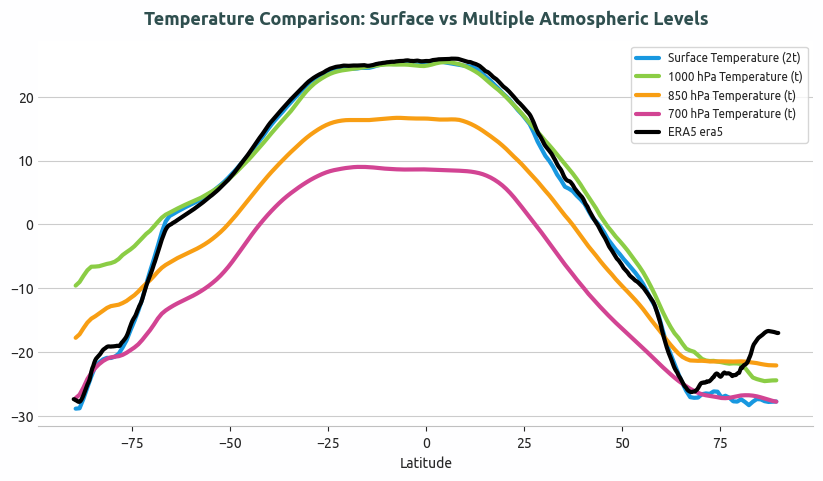

In [18]:
# Use monthly data (which has priority)
multi_line_plot = PlotLatLonProfiles(
    monthly_data=[lonlat_dataset.monthly.isel(time=0),                           
                  lonlat_dataset_2.monthly.sel(plev=100000).isel(time=0),        
                  lonlat_dataset_2.monthly.sel(plev=85000).isel(time=0),         
                  lonlat_dataset_2.monthly.sel(plev=70000).isel(time=0)],
    ref_monthly_data=lonlat_obs.monthly.isel(time=0),  # Reference surface temperature
    loglevel='INFO'
)

data_labels = [f"Surface Temperature ({run_dict['var']})", 
               f"1000 hPa Temperature ({run_dict_2['var']})",
               f"850 hPa Temperature ({run_dict_2['var']})",
               f"700 hPa Temperature ({run_dict_2['var']})"]
ref_label = multi_line_plot.set_ref_label()
title = "Temperature Comparison: Surface vs Multiple Atmospheric Levels"
fig, ax = multi_line_plot.plot_multi_line_profiles(data_labels=data_labels, ref_label=ref_label, title=title)
multi_line_plot.save_plot(fig=fig, var="multi_temp_levels", description="Surface vs multiple atmospheric levels temperature comparison")

We here compute the seasonal and annual means also for 1000, 850 and 700 hPa temperatures:

In [19]:
lonlat_dataset_2.compute_seasonal_and_annual_means()

2025-07-03 18:29:07 :: LatLonProfiles :: INFO     -> Computing seasonal and annual means from monthly data
2025-07-03 18:29:07 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-03 18:29:07 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-03 18:29:07 :: TimStat :: INFO     -> Computing annual mean...
2025-07-03 18:29:07 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully
2025-07-03 18:29:07 :: TimStat :: INFO     -> Computing annual mean...
2025-07-03 18:29:07 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully


Finally, we combine the seasonal means with the annual means here and we use again the PlotLatLonProfiles class to finalise the plot: 

2025-07-03 18:29:45 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-03 18:29:47 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal_multi.climatedt-phase1.ICON.historical-1990.Surface Temp (2t)_1000 hPa Temp (t)_850 hPa Temp (t)_700 hPa Temp (t).png
2025-07-03 18:29:47 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal_multi.climatedt-phase1.ICON.historical-1990.Surface Temp (2t)_1000 hPa Temp (t)_850 hPa Temp (t)_700 hPa Temp (t).png
2025-07-03 18:29:47 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal_multi.climatedt-phase1.ICON.historical-1990.Surface Temp (2t)_1000 hPa Temp (t)_850 hPa Temp (t)_700 hPa Temp (t).png
2025-07-03 18:29:47 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal_multi.climatedt-phase1.ICON.historical-1990.Surface Temp (2t)_1000 hPa Temp (t)_850 hPa Temp

(<Figure size 1400x1000 with 5 Axes>,
 [<Axes: title={'center': 'DJF'}, xlabel='Latitude'>,
  <Axes: title={'center': 'MAM'}, xlabel='Latitude'>,
  <Axes: title={'center': 'JJA'}, xlabel='Latitude'>,
  <Axes: title={'center': 'SON'}, xlabel='Latitude'>,
  <Axes: title={'center': 'Annual Mean'}, xlabel='Latitude'>])

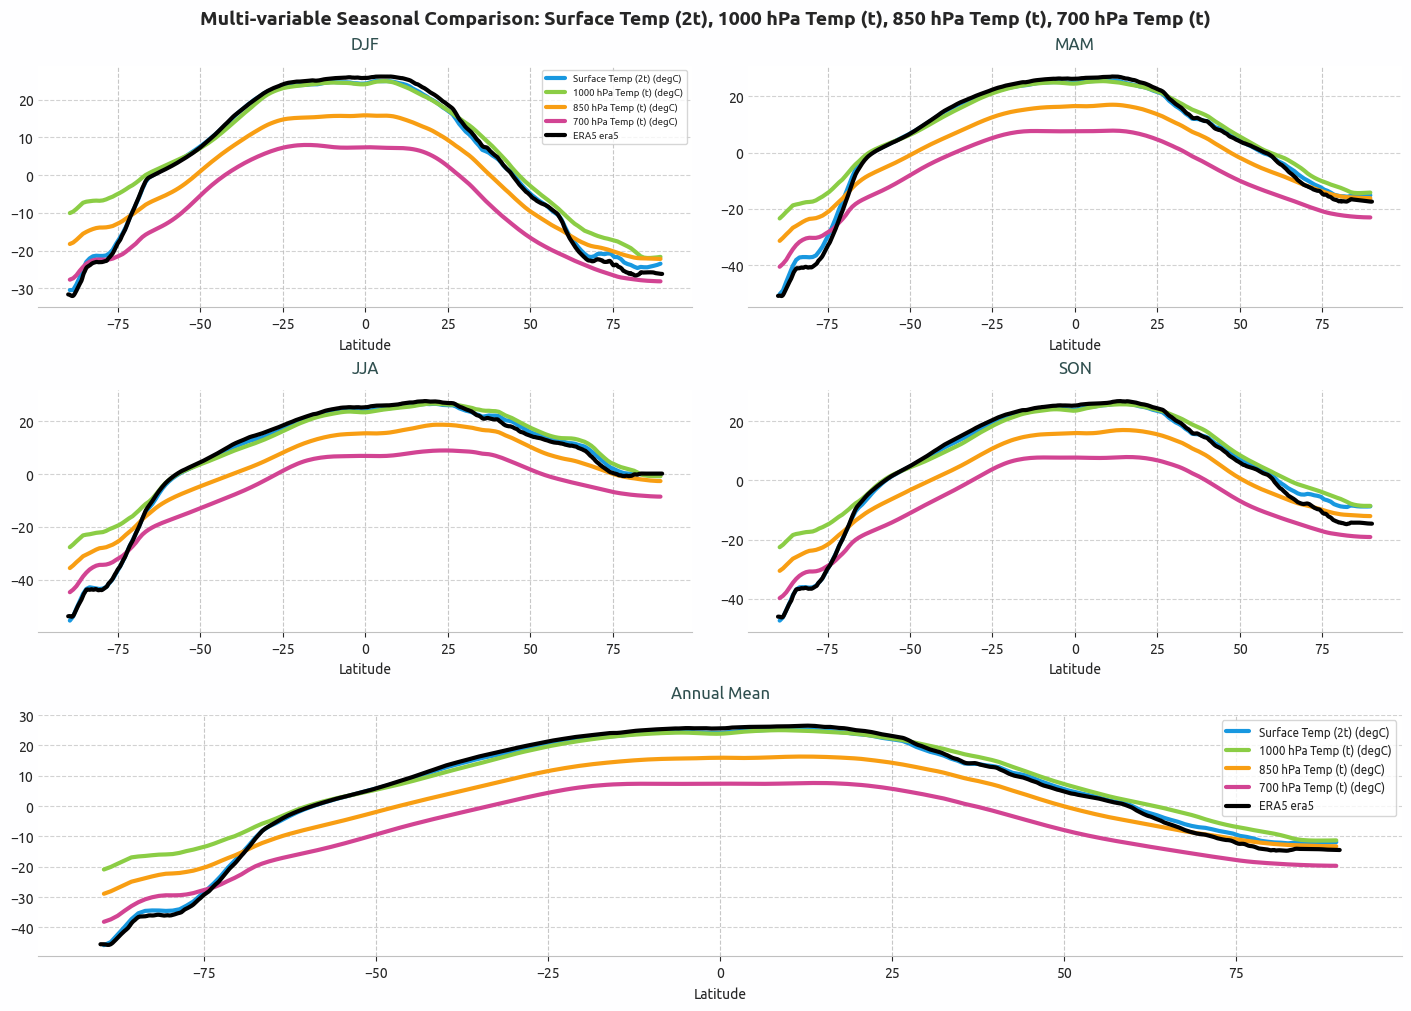

In [ ]:
# Prepare model and reference data separately for proper workflow integration
combined_seasonal_model_data = []
combined_seasonal_ref_data = []

for i in range(5):  # DJF, MAM, JJA, SON, Annual
    combined_seasonal_model_data.append([
        lonlat_dataset.seasonal_annual_means[i],                    # Model data 1 (Surface)
        lonlat_dataset_2.seasonal_annual_means[i].sel(plev=100000), # Model data 2 (1000 hPa)
        lonlat_dataset_2.seasonal_annual_means[i].sel(plev=85000),  # Model data 3 (850 hPa)
        lonlat_dataset_2.seasonal_annual_means[i].sel(plev=70000),  # Model data 4 (700 hPa)
    ])
    combined_seasonal_ref_data.append(lonlat_obs.seasonal_annual_means[i])

# Use the workflow with proper data separation
seasonal_multi_plot = PlotLatLonProfiles(
    seasonal_annual_data=combined_seasonal_model_data, 
    seasonal_annual_ref_data=combined_seasonal_ref_data,
    loglevel='INFO'
)

# Run the multi-seasonal plot using the workflow
seasonal_multi_plot.run_multi_seasonal(
    var_names=[f"Surface Temp ({run_dict['var']})", 
               f"1000 hPa Temp ({run_dict_2['var']})",
               f"850 hPa Temp ({run_dict_2['var']})",
               f"700 hPa Temp ({run_dict_2['var']})"],
    units_list=[run_dict['units'], run_dict_2['units'], run_dict_2['units'], run_dict_2['units']]
)